In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from mpmath.identification import transforms
from torchvision import transforms
from PIL import Image
import os

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [4]:

class MinMaxScaler:
    def __init__(self, clip=True):
        self.clip = clip
        self.min_ = None
        self.max_ = None
    
    def fit(self, X):
        """Compute the min and max values for scaling."""
        self.min_ = X.min(axis=0)
        self.max_ = X.max(axis=0)
    
    def transform(self, X):
        """Scale the data using the fitted min and max values."""
        X_scaled = (X - self.min_) / (self.max_ - self.min_)
        
        if self.clip:
            X_scaled = np.clip(X_scaled, 0, 1)
        
        return X_scaled
    
    def fit_transform(self, X):
        """Fit to the data, then transform it."""
        self.fit(X)
        return self.transform(X)
    
    def inverse_transform(self, X_scaled):
        """Inverse the scaling back to original data."""
        return X_scaled * (self.max_ - self.min_) + self.min_

In [5]:
pic1=np.load("E:/GitHub/DinoV2_in_medical_classification/img/00028173_014.png.npy")
pic1


array([[-2.52419949e-01,  1.26285181e+01, -2.16778350e+00,
         4.03327799e+00, -3.12239718e+00, -8.32266808e+00,
         1.42210233e+00,  3.59408712e+00,  2.31688118e+00,
         2.28312469e+00,  3.33940834e-01,  2.92380095e+00,
        -4.61505949e-02,  1.59757340e+00,  4.71547890e+00,
         2.25156263e-01, -2.19054842e+00, -3.12949276e+00,
         4.95647043e-01, -4.80309546e-01, -3.59687388e-01,
        -3.25432086e+00,  3.99628377e+00, -4.97596693e+00,
         1.45460379e+00,  1.48367751e+00, -1.34670526e-01,
         2.49531412e+00, -8.26342869e+00,  1.83955526e+00,
         3.41232729e+00, -2.00463581e+00,  8.48476529e-01,
         1.23022509e+00,  1.52516127e+00, -3.49435854e+00,
        -1.44125497e+00, -8.31736565e+00, -3.56412935e+00,
         1.50181341e+00, -3.53696489e+00,  2.25394636e-01,
        -3.76366043e+00,  1.96435726e+00, -2.77326250e+00,
        -2.74432182e+00, -2.60610080e+00, -2.53857374e+00,
         8.19113255e-01, -1.80901492e+00, -2.38505411e+0

In [6]:
pic1=pic1[:,:-3]  
pic1

array([[-2.52419949e-01,  1.26285181e+01, -2.16778350e+00,
         4.03327799e+00, -3.12239718e+00, -8.32266808e+00,
         1.42210233e+00,  3.59408712e+00,  2.31688118e+00,
         2.28312469e+00,  3.33940834e-01,  2.92380095e+00,
        -4.61505949e-02,  1.59757340e+00,  4.71547890e+00,
         2.25156263e-01, -2.19054842e+00, -3.12949276e+00,
         4.95647043e-01, -4.80309546e-01, -3.59687388e-01,
        -3.25432086e+00,  3.99628377e+00, -4.97596693e+00,
         1.45460379e+00,  1.48367751e+00, -1.34670526e-01,
         2.49531412e+00, -8.26342869e+00,  1.83955526e+00,
         3.41232729e+00, -2.00463581e+00,  8.48476529e-01,
         1.23022509e+00,  1.52516127e+00, -3.49435854e+00,
        -1.44125497e+00, -8.31736565e+00, -3.56412935e+00,
         1.50181341e+00, -3.53696489e+00,  2.25394636e-01,
        -3.76366043e+00,  1.96435726e+00, -2.77326250e+00,
        -2.74432182e+00, -2.60610080e+00, -2.53857374e+00,
         8.19113255e-01, -1.80901492e+00, -2.38505411e+0

In [7]:

pic2=np.load("E:/GitHub/DinoV2_in_medical_classification/img/00028174_000.png.npy")
pic2=pic2[:,:-3]
pic2

array([[ 4.94802415e-01,  6.66572189e+00, -2.07519698e+00,
         4.35038519e+00, -3.07676959e+00, -7.77118874e+00,
         4.36929502e-02,  2.80954552e+00,  3.44855642e+00,
         5.13052754e-02,  4.08260405e-01,  3.04862809e+00,
        -1.20384800e+00,  1.47317314e+00,  5.07535267e+00,
         1.70824349e+00, -2.30102992e+00, -3.47951698e+00,
        -2.75208664e+00, -6.56448901e-01, -7.24707484e-01,
        -2.25528097e+00,  3.93688226e+00, -1.55466485e+00,
         1.50585473e+00,  7.75400758e-01,  9.03001010e-01,
         2.44267225e+00, -3.51091385e+00,  1.04245007e-01,
         3.28365564e+00, -1.82292473e+00,  1.00535154e+00,
         3.32840753e+00,  1.13502860e+00, -3.85001254e+00,
        -1.52216828e+00, -6.50124454e+00, -4.11548710e+00,
         3.15931529e-01, -2.78855991e+00,  2.35367253e-01,
        -4.01949358e+00,  2.77889466e+00, -1.39515138e+00,
        -1.40950656e+00, -3.64409351e+00, -2.42258263e+00,
         1.33149981e+00, -2.37706947e+00, -3.66790295e+0

In [8]:
pic3=np.load("E:/GitHub/DinoV2_in_medical_classification/img/00028178_000.png.npy")
pic3=pic3[:,:-3]
pic3

array([[ 3.74197274e-01,  1.30492201e+01, -1.36086714e+00,
         3.66752577e+00, -2.75198150e+00, -9.09224319e+00,
         1.08837581e+00,  5.03824377e+00,  3.39324522e+00,
         5.94303131e-01, -5.30707181e-01,  2.71470141e+00,
        -5.87443948e-01,  2.30559015e+00,  4.13136148e+00,
         1.56662142e+00, -2.13646364e+00, -3.72333431e+00,
        -2.26093984e+00, -2.25039339e+00,  1.46646023e+00,
        -2.03901339e+00,  3.50107956e+00, -4.88520241e+00,
         1.65536797e+00,  5.29802144e-01,  1.12772846e+00,
         2.29107952e+00, -6.12800264e+00,  6.22525334e-01,
         3.99125266e+00, -1.60726571e+00,  2.36100101e+00,
         2.46791553e+00,  5.75465918e-01, -4.95781994e+00,
        -1.82100964e+00, -7.41220665e+00, -3.42768645e+00,
         1.46866882e+00, -2.92560458e+00,  1.25750184e-01,
        -2.87080455e+00,  4.28777313e+00, -2.94417524e+00,
        -8.39972734e-01, -2.54868054e+00, -1.79685330e+00,
         1.20449567e+00, -1.66333139e+00, -3.55259299e+0

In [9]:
pic4=np.load("E:/GitHub/DinoV2_in_medical_classification/img/00028179_000.png.npy")
pic4=pic4[:,:-3]
pic4

array([[ 3.25599968e-01,  8.99961472e+00, -2.05612350e+00,
         4.57939816e+00, -3.68146992e+00, -7.39445925e+00,
         5.08870780e-01,  3.85775185e+00,  2.35649681e+00,
        -1.21093392e+00,  2.14544445e-01,  3.16760969e+00,
        -1.04659510e+00,  2.39462447e+00,  4.99598169e+00,
         1.79178751e+00, -1.93542242e+00, -3.34340334e+00,
        -1.35160029e+00, -6.65636361e-01,  7.04757631e-01,
        -1.36324358e+00,  3.25634861e+00, -1.52739418e+00,
         2.09917092e+00,  6.66934252e-01, -9.74702314e-02,
         2.29443026e+00, -5.56698799e+00,  5.72660975e-02,
         4.04324007e+00, -2.24742007e+00,  2.83831859e+00,
         2.49192548e+00,  1.14290786e+00, -4.35115147e+00,
        -2.01931810e+00, -7.06915522e+00, -3.85068154e+00,
         3.76755416e-01, -3.43797231e+00,  7.58489311e-01,
        -2.85029483e+00,  2.89614534e+00, -1.19363856e+00,
        -2.00916529e+00, -2.83149648e+00, -2.50908446e+00,
         1.22913337e+00, -2.19238162e+00, -3.30912256e+0

### DEVICE

In [10]:
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')
    
device

device(type='cpu')

### import dinoV2

In [15]:
dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')
dinov2_vits14 = dinov2_vits14.to(device)

Using cache found in C:\Users\PC/.cache\torch\hub\facebookresearch_dinov2_main
C:\Users\PC/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
C:\Users\PC/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
C:\Users\PC/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


###PCA


In [25]:
pca=PCA(3)
scaler= MinMaxScaler(clip=True)
patch_size = dinov2_vits14.patch_size

patch_size = 14
IMG_SIZE = 1024

patch_h  = 72
patch_w  = 72
feat_dim = 384 # vitl14


In [17]:
pre_process = transforms.Compose([
    transforms.Resize(IMG_SIZE), #just in case 
    transforms.CenterCrop(1008), #72 * patch size
    transforms.ToTensor(),
    transforms.Normalize(mean=0.52, std=0.23) # data set specific
])

In [47]:
total_features  = []
root_path=f'C:/Users/PC/Downloads/Xray/'
img_list = ["C:/Users/PC/Downloads/Xray/images_008/images/00018385_001.png","C:/Users/PC/Downloads/Xray/images_003/images/00006571_003.png","C:/Users/PC/Downloads/Xray/images_011/images/00028166_004.png",
   "C:/Users/PC/Downloads/Xray/images_005/images/00011557_000.png"         ]
with torch.no_grad():
  for img_path in img_list:
    img = Image.open(img_path).convert('RGB')
    img_t = pre_process(img).to(device)
    
    features_dict = dinov2_vits14.forward_features(img_t.unsqueeze(0))
    features = features_dict['x_norm_patchtokens']
    total_features.append(features)

total_features = torch.cat(total_features, dim=0)
print(f"Shape of total_features before reshaping: {total_features.shape}")
total_features = total_features.reshape(4*patch_h*patch_w , feat_dim) #4(*H*w, 1024)
total_features = total_features.cpu()
pca=PCA(n_components=3)
pca.fit(total_features)
pca_features=pca.transform(total_features)

Shape of total_features before reshaping: torch.Size([4, 5184, 384])


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\GitHub\\DinoV2_in_medical_classification\\pca_images\\features_hist.png'

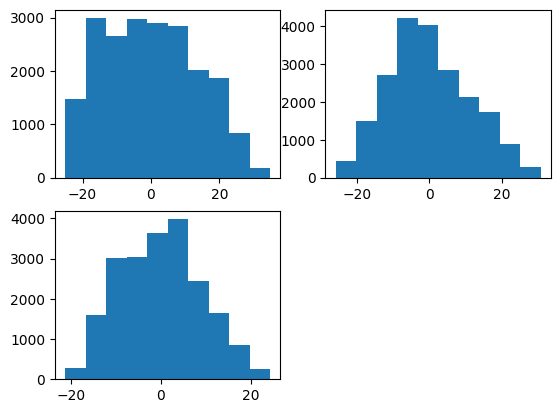

In [48]:
plt.subplot(2, 2, 1)
plt.hist(pca_features[:, 0])
plt.subplot(2, 2, 2)
plt.hist(pca_features[:, 1])
plt.subplot(2, 2, 3)
plt.hist(pca_features[:, 2])
plt.savefig("pca_images/features_hist.png")
plt.show()
# plt.close()

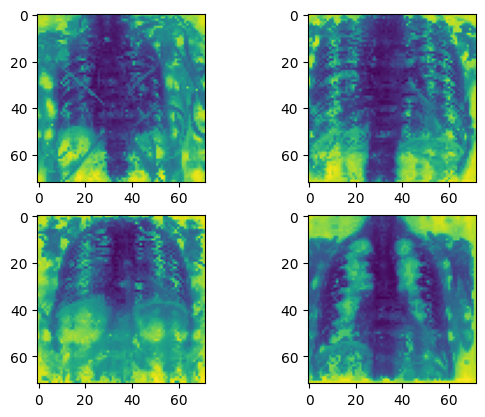

In [49]:
pca_features[:, 0] = (pca_features[:, 0] - pca_features[:, 0].min()) / \
                     (pca_features[:, 0].max() - pca_features[:, 0].min())
# pca_features = sklearn.processing.minmax_scale(pca_features)

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(pca_features[i*patch_h*patch_w : (i+1)*patch_h*patch_w, 0].reshape(patch_h, patch_w))

plt.show()

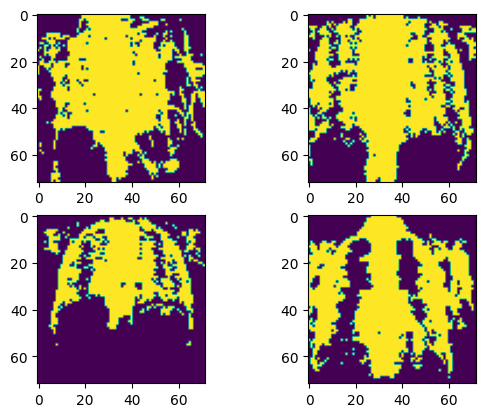

In [57]:
pca_features_bg = pca_features[:, 0] < 0.4# from first histogram
pca_features_fg = ~pca_features_bg

# plot the pca_features_bg
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(pca_features_bg[i * patch_h * patch_w: (i+1) * patch_h * patch_w].reshape(patch_h, patch_w))
plt.show()

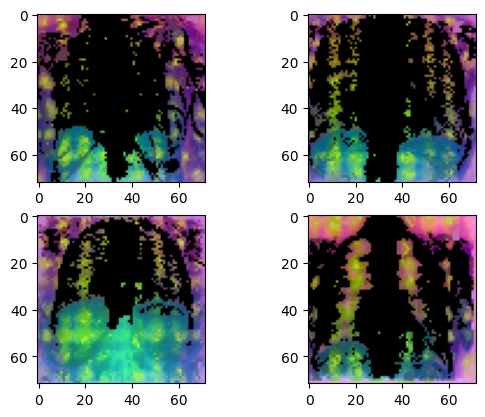

In [58]:
pca.fit(total_features[pca_features_fg]) 
pca_features_left = pca.transform(total_features[pca_features_fg])

for i in range(3):
    # min_max scaling
    pca_features_left[:, i] = (pca_features_left[:, i] - pca_features_left[:, i].min()) / (pca_features_left[:, i].max() - pca_features_left[:, i].min())

pca_features_rgb = pca_features.copy()
# for black background|
pca_features_rgb[pca_features_bg] = 0
# new scaled foreground features
pca_features_rgb[pca_features_fg] = pca_features_left

# reshaping to numpy image format
pca_features_rgb = pca_features_rgb.reshape(4, patch_h, patch_w, 3)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(pca_features_rgb[i])

plt.show()